In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Request the page
url = "https://pokemondb.net/pokedex/all"   # replace with actual Pokédex URL
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find the table
table = soup.find("table", {"id": "pokedex"})

# Step 3: Extract header names
headers = [th.text.strip() for th in table.find("tr").find_all("th")]

# Step 4: Extract table rows
rows = []
for tr in table.find_all("tr")[1:]:  # skip header
    cells = [td.text.strip() for td in tr.find_all("td")]
    if cells:
        rows.append(cells)

# Step 5: Convert rows to DataFrame
df = pd.DataFrame(rows, columns=headers)


# ✅ Example usage
df.head()           # DataFrame preview
    # First 5 HP values


,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,0004,Charmander,Fire,309,39,52,43,60,50,65


In [3]:
df.shape

(1215, 10)

In [4]:
df.isnull().any()

#          False
Name       False
Type       False
Total      False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
dtype: bool

In [5]:
df.isnull().sum()

#          0
Name       0
Type       0
Total      0
HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1215 non-null   object
 1   Name     1215 non-null   object
 2   Type     1215 non-null   object
 3   Total    1215 non-null   object
 4   HP       1215 non-null   object
 5   Attack   1215 non-null   object
 6   Defense  1215 non-null   object
 7   Sp. Atk  1215 non-null   object
 8   Sp. Def  1215 non-null   object
 9   Speed    1215 non-null   object
dtypes: object(10)
memory usage: 95.1+ KB


In [7]:
import pandas as pd

# Assuming your DataFrame is df
# Convert columns that should be numeric
numeric_cols = ["#", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # convert to numbers, NaN if fails

# ✅ Now check dtypes
print(df.dtypes)

# Example usage
print(df.head())


#           int64
Name       object
Type       object
Total       int64
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object
   #                    Name          Type  Total  HP  Attack  Defense  \
0  1               Bulbasaur  Grass Poison    318  45      49       49   
1  2                 Ivysaur  Grass Poison    405  60      62       63   
2  3                Venusaur  Grass Poison    525  80      82       83   
3  3  Venusaur Mega Venusaur  Grass Poison    625  80     100      123   
4  4              Charmander          Fire    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  
0       65       65     45  
1       80       80     60  
2      100      100     80  
3      122      120     80  
4       60       50     65  


In [8]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


In [9]:
df.duplicated().sum()

0

In [10]:
df[['Type1', 'Type2']] = df['Type'].str.split(expand=True, n=1)

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.isnull().any()

#          False
Name       False
Type       False
Total      False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
Type1      False
Type2       True
dtype: bool

In [13]:
df["Type2"].isnull().sum() 

546

In [14]:
df["Type2"].dropna()

0        Poison
1        Poison
2        Poison
3        Poison
6        Flying
         ...   
1207     Dragon
1208     Dragon
1209    Psychic
1210    Psychic
1214      Ghost
Name: Type2, Length: 669, dtype: object

In [15]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type1,Type2
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison
4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None


In [16]:
df.drop(columns=["Type"], inplace=True)


In [17]:
df.drop(columns=["Type2"], inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (1215, 10)

Missing Values:
 #          0
Name       0
Total      0
HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
Type1      0
dtype: int64

Summary Statistics:
                  #        Total           HP       Attack      Defense  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean    501.735802   443.104527    71.244444    81.152263    75.007407   
std     298.979081   121.193406    26.927819    32.037134    30.740999   
min       1.000000   175.000000     1.000000     5.000000     5.000000   
25%     240.500000   332.000000    52.000000    57.000000    52.000000   
50%     495.000000   465.000000    70.000000    80.000000    70.000000   
75%     753.500000   521.000000    85.000000   100.000000    91.000000   
max    1025.000000  1125.000000   255.000000   190.000000   250.000000   

           Sp. Atk      Sp. Def        Speed  
count  1215.000000  1215.000000  1215.000000  
mean     73.224691    72.44115

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1215 non-null   int64 
 1   Name     1215 non-null   object
 2   Total    1215 non-null   int64 
 3   HP       1215 non-null   int64 
 4   Attack   1215 non-null   int64 
 5   Defense  1215 non-null   int64 
 6   Sp. Atk  1215 non-null   int64 
 7   Sp. Def  1215 non-null   int64 
 8   Speed    1215 non-null   int64 
 9   Type1    1215 non-null   object
dtypes: int64(8), object(2)
memory usage: 95.1+ KB


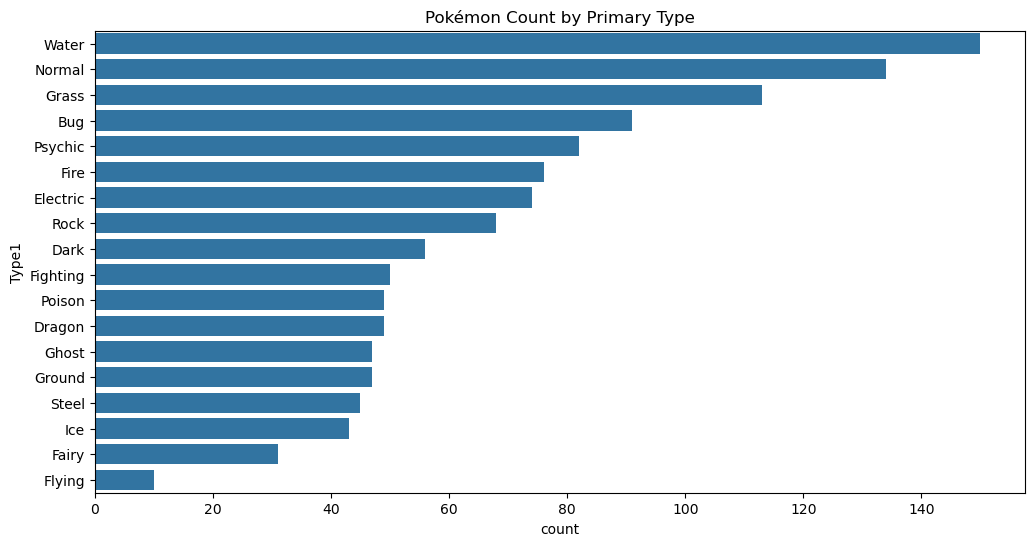

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(y="Type1", data=df, order=df["Type1"].value_counts().index)
plt.title("Pokémon Count by Primary Type")
plt.show()

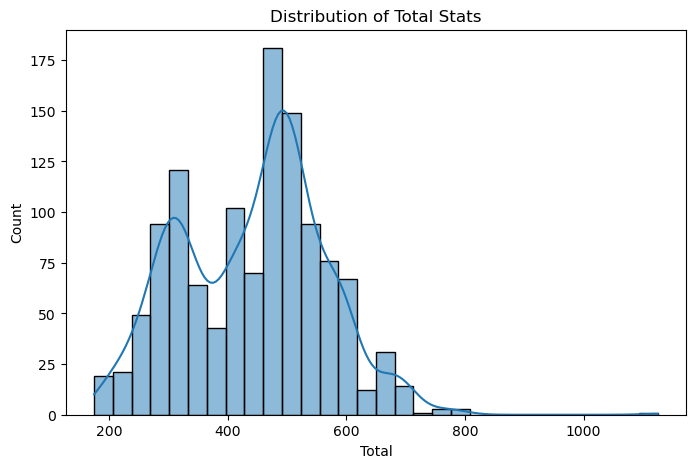

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total"], bins=30, kde=True)
plt.title("Distribution of Total Stats")
plt.show()


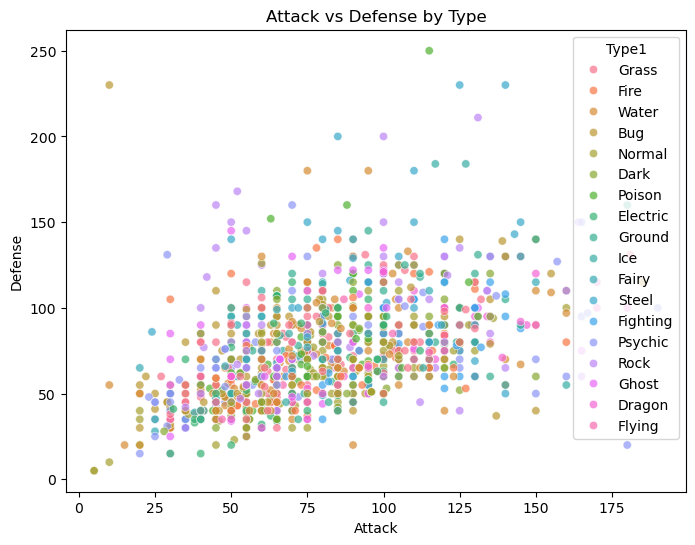

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Attack", y="Defense", hue="Type1", data=df, alpha=0.7)
plt.title("Attack vs Defense by Type")
plt.show()


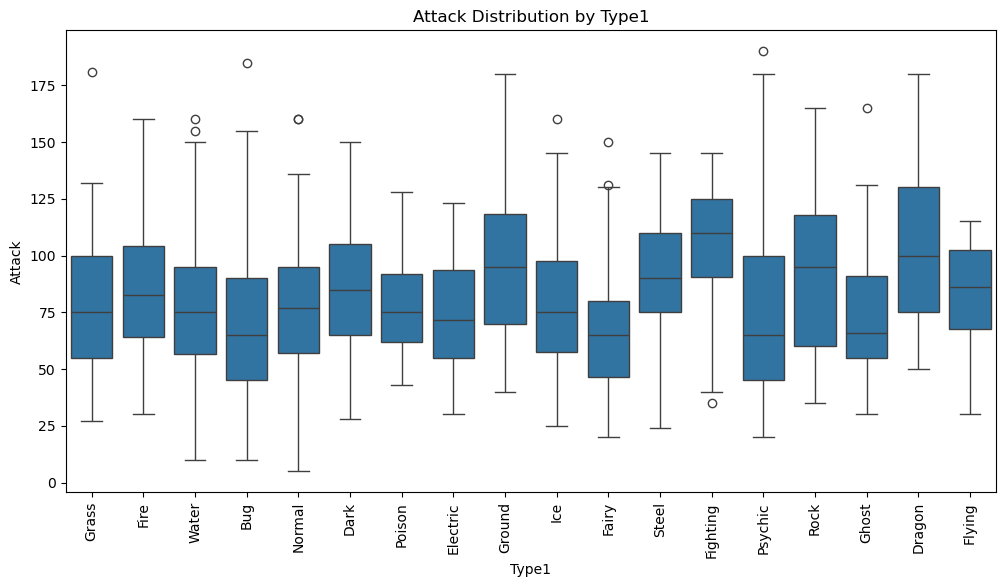

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Type1", y="Attack", data=df)
plt.xticks(rotation=90)
plt.title("Attack Distribution by Type1")
plt.show()

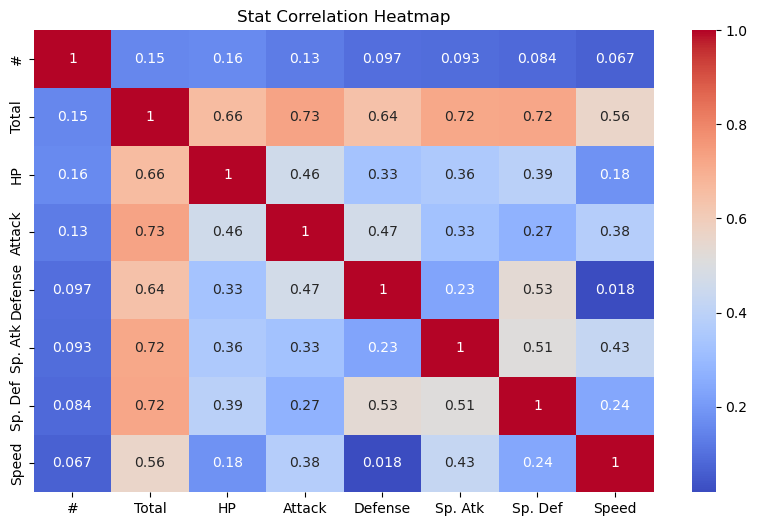

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Stat Correlation Heatmap")
plt.show()

In [26]:
avg_stats_by_type = df.groupby("Type1")[numeric_cols[1:]].mean().sort_values("Total", ascending=False)
print("\nAverage Stats by Primary Type:\n", avg_stats_by_type)



Average Stats by Primary Type:
                Total         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type1                                                                           
Dragon    527.551020  84.571429  103.816327   80.816327  90.122449  83.571429   
Steel     489.888889  71.177778   92.511111  114.266667  75.155556  79.222222   
Psychic   486.402439  73.841463   75.646341   71.524390  98.719512  86.304878   
Fighting  458.080000  75.740000  104.960000   76.440000  55.160000  69.660000   
Fire      456.986842  70.763158   84.473684   69.315789  86.828947  71.644737   
Flying    450.500000  70.900000   81.900000   67.400000  72.600000  70.900000   
Dark      449.714286  72.892857   85.482143   70.982143  72.267857  70.553571   
Electric  449.405405  63.837838   73.148649   65.837838  88.675676  70.405405   
Fairy     449.225806  72.129032   71.064516   73.645161  78.129032  87.193548   
Rock      449.132353  68.117647   90.676471   97.352941  61.838235  72.73529

In [27]:
def plot_radar(pokemon_names, df):
    stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
    num_vars = len(stats)

    # Setup angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete loop

    plt.figure(figsize=(8, 8))
    
    for name in pokemon_names:
        row = df[df["Name"].str.lower() == name.lower()].iloc[0]
        values = [row[stat] for stat in stats]
        values += values[:1]  # repeat first value to close loop

        plt.polar(angles, values, label=row["Name"], linewidth=2)
        plt.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], stats)
    plt.title("Pokémon Stat Radar Chart", size=16, weight="bold")
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

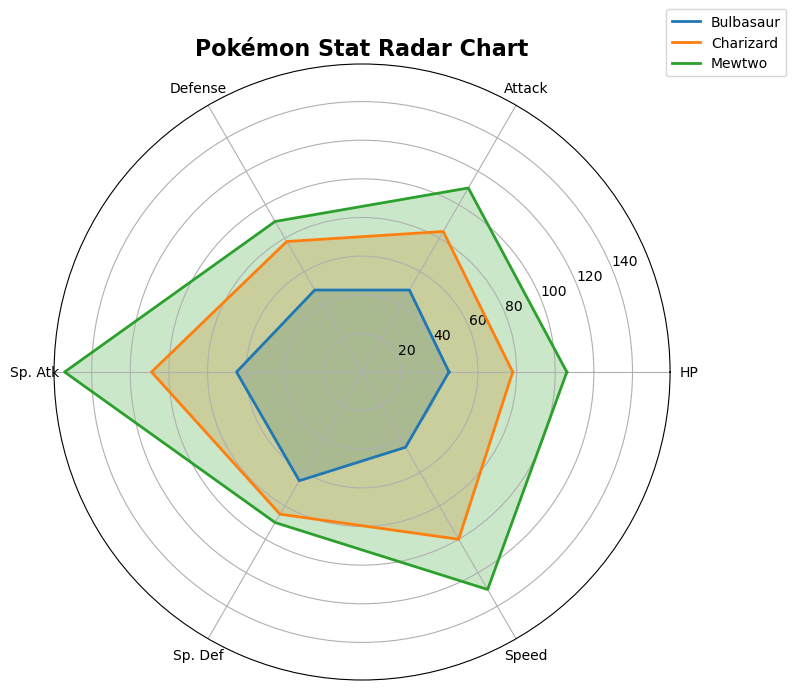

In [28]:
plot_radar(["Bulbasaur", "Charizard", "Mewtwo"], df)


In [29]:
df.to_csv("cleaned_pokedex.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_pokedex.csv'")


✅ Cleaned dataset saved as 'cleaned_pokedex.csv'
